In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_house = pd.read_csv("house_price.csv")
df_nb_chambre = pd.read_csv("nombre_de_chambres.csv", header=None, names=['id', 'chambre'])
df_sdb = pd.read_csv("nombre_de_sdb.csv", header=None, names=['id', 'sdb'])
df_superficie = pd.read_csv("superficie.csv", header=None, names=['id', 'superficie'])


In [3]:
df_house

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0
...,...,...,...
95,95,15,157223.0
96,96,81,1616313.0
97,97,42,143573.0
98,98,19,974546.0


In [4]:
df_nb_chambre

,id,chambre
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2
...,...,...
95,95,3
96,96,2
97,97,2
98,98,2


In [5]:
df_sdb

,id,sdb
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1
...,...,...
95,95,3
96,96,1
97,97,1
98,98,1


In [6]:
df_superficie

,id,superficie
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713
...,...,...
95,95,11417
96,96,12126
97,97,16390
98,98,23738


In [7]:
df_total = df_house.merge(df_superficie, how="inner", on='id').merge(df_nb_chambre, how="inner", on='id').merge(df_sdb, how="inner", on='id')

In [8]:
df_total

,Unnamed: 0,id,house_price,superficie,chambre,sdb
0,0,14,1918154.0,26824,4,1
1,1,30,739142.0,23872,4,2
2,2,70,1621938.0,26539,2,2
3,3,77,1319862.0,29449,2,1
4,4,50,146250.0,10502,2,3
...,...,...,...,...,...,...
95,95,15,157223.0,12754,2,2
96,96,81,1616313.0,25647,1,3
97,97,42,143573.0,13185,3,2
98,98,19,974546.0,20928,2,3


In [9]:
df_total["superficie"].mean()

20439.77

In [10]:
df_total["chambre"].mean()


2.42

In [11]:
df_total["chambre"].median()


2.0

In [12]:
df_total["house_price"].mean()


767747.87

In [13]:
df_total["price_mean"] = df_total["house_price"] // df_total["chambre"]

In [14]:
df_total

,Unnamed: 0,id,house_price,superficie,chambre,sdb,price_mean
0,0,14,1918154.0,26824,4,1,479538.0
1,1,30,739142.0,23872,4,2,184785.0
2,2,70,1621938.0,26539,2,2,810969.0
3,3,77,1319862.0,29449,2,1,659931.0
4,4,50,146250.0,10502,2,3,73125.0
...,...,...,...,...,...,...,...
95,95,15,157223.0,12754,2,2,78611.0
96,96,81,1616313.0,25647,1,3,1616313.0
97,97,42,143573.0,13185,3,2,47857.0
98,98,19,974546.0,20928,2,3,487273.0


In [15]:
condition = [
    (df_total["superficie"] >= 25000),
    (df_total["superficie"] < 25000) & (df_total["superficie"] >= 20000),
    (df_total["superficie"] < 20000) & (df_total["superficie"] >= 15000),
    (df_total["superficie"] < 15000) & (df_total["superficie"] >= 10000),
    (df_total["superficie"] < 10000)
]

In [16]:
choice = ["very large", "large", "medium", "small", "very small"]

In [17]:
df_total["house_size"] = np.select(condition, choice, default='None')

In [18]:
df_total

,Unnamed: 0,id,house_price,superficie,chambre,sdb,price_mean,house_size
0,0,14,1918154.0,26824,4,1,479538.0,very large
1,1,30,739142.0,23872,4,2,184785.0,large
2,2,70,1621938.0,26539,2,2,810969.0,very large
3,3,77,1319862.0,29449,2,1,659931.0,very large
4,4,50,146250.0,10502,2,3,73125.0,small
...,...,...,...,...,...,...,...,...
95,95,15,157223.0,12754,2,2,78611.0,small
96,96,81,1616313.0,25647,1,3,1616313.0,very large
97,97,42,143573.0,13185,3,2,47857.0,small
98,98,19,974546.0,20928,2,3,487273.0,large


In [19]:
df_total.groupby("house_size")["house_price"].mean()

house_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.552456e+06
Name: house_price, dtype: float64

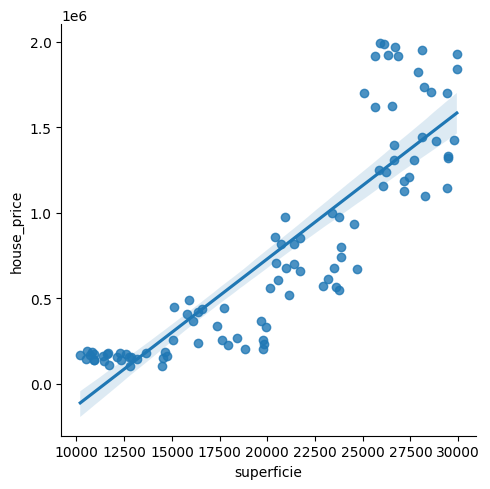

In [20]:
sns.lmplot(x = "superficie", y="house_price", data = df_total)